In [374]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerPatch

In [375]:
# Load in csv
city_data = r"C:\Users\sitra\Desktop\RUTSOM201710DATA5-Class-Repository-DATA\HW5\Pyber\raw_data/city_data.csv"
ride_data = r"C:\Users\sitra\Desktop\RUTSOM201710DATA5-Class-Repository-DATA\HW5\Pyber\raw_data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)


In [376]:
# Merge the two datasets with common data on "city"
combined_car_df = pd.merge(city_data_df, ride_data_df,on="city")
combined_car_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [377]:
# Open a new column called "Rides" with size attribute of "type" - total rides per city
combined_car_df["Rides"]=combined_car_df.groupby('city')["type"].transform("size")


In [378]:
combined_car_copy_df=combined_car_df.copy()

highest=combined_car_copy_df["Rides"].max()
combined_car_copy_df[combined_car_copy_df["Rides"]==highest]
# Delete rows from 1902 to 1965 as they are outliers
combined_car_copy_df=combined_car_copy_df.drop(combined_car_copy_df.index[[1902,1965]])

In [379]:
#New Dataframe with groupby mean value of 'fare'
grouped_df =combined_car_copy_df.groupby('city')['fare']
new1_df=pd.DataFrame(round(grouped_df.mean(),2).reset_index(name="Avg Fare"))


In [380]:
#New Dataframe with groupby mean value of 'fare'
grouped_df =combined_car_copy_df.groupby('city')['type']
new2_df=pd.DataFrame(grouped_df.size().reset_index(name="Rides"))


In [381]:
combo_df=pd.merge(city_data_df, new1_df,on="city")
combo_df=pd.merge(combo_df,new2_df,on="city")


In [382]:
# Add a new column 'color' for each 'type' category 
combo_df.loc[combo_df["type"]=="Urban","color"]="lightcoral"
combo_df.loc[combo_df["type"]=="Suburban","color"]="lightskyblue"
combo_df.loc[combo_df["type"]=="Rural","color"]="gold"


In [383]:
# Data on "Port James" city has two rows and are outliers
# can be deleted by using df=df[df."city"=="Port James"] or df =df.drop(df.index[[84,85]])
highest=combo_df["Rides"].max()
combo_df[combo_df["Rides"]==highest]

,city,driver_count,type,Avg Fare,Rides,color
84,Port James,15,Suburban,32.0,62,lightskyblue
85,Port James,3,Suburban,32.0,62,lightskyblue


In [384]:
#Dropping rows # 84 and  85 as outliers
combo_df=combo_df.drop(combo_df.index[[84,85]])

In [385]:
max_x=combo_df["Rides"].max()

In [386]:
max_y=combo_df["Avg Fare"].max()

In [387]:
min_y=combo_df['Avg Fare'].min()

In [388]:
# The maximum x value for our chart will be 100
x_limit = max_x

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = combo_df["Rides"]

# Create a random array of data that we will use for our y values
y_axis =combo_df["Avg Fare"] 

# Assign color based on "type" category
color=combo_df["color"]

# Area of markers is proportional to driver count for each city
size=combo_df["driver_count"]



In [389]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors=color, 
            s=size*4, alpha=0.65)

In [390]:
# The y limits of our scatter plot is 0 to 1
plt.ylim(min_y-4.48,max_y +5.39)

(15.039999999999999, 55.009999999999998)

In [391]:
# The x limits of our scatter plot is 0 to 100
plt.xlim(0, x_limit+1)

(0, 35)

In [392]:
# Set a  title and labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(b=True, which='both', color='0.75',linestyle='-')

In [393]:
# Create a legend for the chart

colors = combo_df["color"].unique()  
texts =  combo_df["type"].unique()    
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.85, 0.85), 
           loc='center', ncol=1, facecolor="white", numpoints=1 )



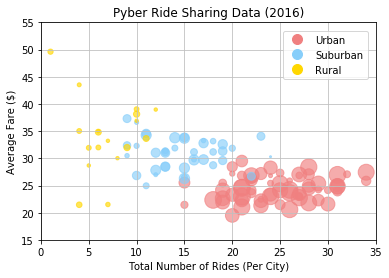

In [394]:
# Print the scatter plot to the screen
plt.show()

In [395]:
# Total Fares by City Type
# Use groupby to calculate total fare by sum attribute and name the column as 'Total Fare'
grouped_df =combined_car_copy_df.groupby('type')['fare']
new_df=pd.DataFrame(round(grouped_df.sum(),2).reset_index(name="Total Fare"))


In [396]:
# DATASET 1
Total_fare = new_df['Total Fare']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

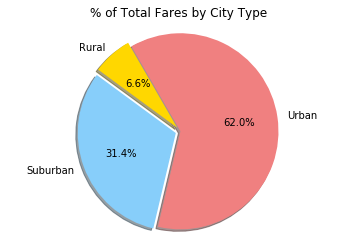

In [397]:
plt.title("% of Total Fares by City Type")
plt.pie(Total_fare, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [398]:
# Total Rides by City Type
# Use groupby to calculate total rides by size attribute and name the column as 'Total Rides'
grouped_df =combined_car_copy_df.groupby('type')['city']
new_df=pd.DataFrame(grouped_df.size().reset_index(name="Total Rides"))


In [399]:
# DATASET 2
Total_rides = new_df['Total Rides']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

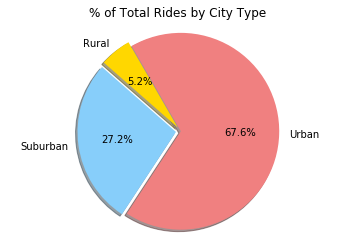

In [400]:
plt.title("% of Total Rides by City Type")
plt.pie(Total_rides, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [401]:
# Total drivers by City Type
city_data_df=city_data_df[city_data_df["city"]!="Port James"]
grouped_df =city_data_df.groupby('type')['driver_count']
new_df=pd.DataFrame(grouped_df.sum().reset_index(name="Total Drivers"))


In [402]:
# DATASET 3
Total_drivers = new_df['Total Drivers']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

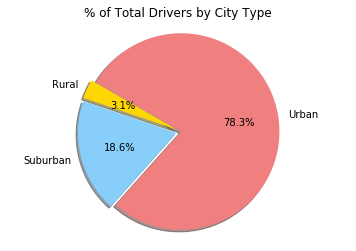

In [373]:
plt.title("% of Total Drivers by City Type")
plt.pie(Total_drivers, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.show()